In [3]:
import TimeSliceImport
import numpy as np
import keras
from keras.models import Sequential

from keras.layers import (Dense, Dropout, Activation, Conv1D,Conv2D, Flatten)
from keras.layers import (MaxPooling1D,BatchNormalization,MaxPooling2D, GlobalAveragePooling1D,LSTM)
from keras.optimizers import (SGD,Adam)
from sklearn import (metrics,preprocessing)
import RamanPlotTools as pt
import matplotlib.pyplot as plt
from keras.backend import tensorflow_backend as backend


from IPython.display import SVG,display
from keras.utils.vis_utils import model_to_dot, plot_model
from ann_visualizer.visualize import ann_viz


Using TensorFlow backend.


In [4]:
print(backend.device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13355666234211550280
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7249087693
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10724625052800785610
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [7]:
path="/home/waseda/Desktop/shared/SKYP_KYP_SYP"
start=201
end=1600
points=1000
numClasses=4
types=["PS", "yeast","spore","kleb"]
spectra=TimeSliceImport.importData(path,types)
classes=list(map(lambda x:TimeSliceImport.RamanSample.mappings[x],types))
sortedTypesTuples=sorted(zip(types,classes),key=lambda x:x[1])
sortedTypes=[x[0] for x in sortedTypesTuples]



def makeRandomData(filter="NONE"):
    trainingSamples, validationSamples = TimeSliceImport.splitData(spectra, 0.25)
    trainingSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points, filter=filter), trainingSamples))
    validationSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points,filter=filter), validationSamples))
    trainingData,trainingClasses,validationData,validationClasses = TimeSliceImport.makeSVMInputData(trainingSpectraList, validationSpectraList)

    oneHotTrainingClasses=keras.utils.to_categorical(trainingClasses,num_classes=numClasses)
    oneHotValidationClasses=keras.utils.to_categorical(validationClasses,num_classes=numClasses)
    return trainingData, oneHotTrainingClasses, validationData, oneHotValidationClasses

trainingData, oneHotTrainingClasses, validationData, oneHotValidationClasses=makeRandomData()


def makePerCellTrainingData():
    trainingSamples, validationSamples = TimeSliceImport.splitData(spectra, 0.25)
    trainingSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points), trainingSamples))
    validationSpectraList = list(map(lambda x: x.interpolatedSpectra(start, end, points), validationSamples))

    trainingData,trainingClasses,validationData,validationClasses = TimeSliceImport.makeMultiDimensionalData(trainingSpectraList=trainingSpectraList,
                                                                                                         validationSpectraList=validationSpectraList,
                                                                                                         normalize=True,
                                                                                                         oneHot=True)
    return trainingData,trainingClasses,validationData,validationClasses



def scalarClassesFromOneHotArray(oneHotArray):
    return np.argmax(oneHotArray,axis=1)

def plotResult(truth,result, score, normalize=False):
    pt.plotResult(scalarClassesFromOneHotArray(result),scalarClassesFromOneHotArray(truth),sortedTypes)
    mtrx = metrics.confusion_matrix(scalarClassesFromOneHotArray(truth),scalarClassesFromOneHotArray(result))
    pt.plotConfusionMatrix(mtrx,sortedTypes,"Classification Result (%.03g )" % score, normalize=normalize)

def plotLearning(history):
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy', 'Cross-Validation Accuracy'])
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training Loss', 'Cross-Validation Loss'])
    plt.show()

def showModel(mode):
    svg=SVG(model_to_dot(model, show_layer_names=False, show_shapes=True).create(prog='dot', format='svg'))
    display(svg)
    
def saveModel(fileName):
    outP=path+"/out/"+fileName
    plot_model(model,show_layer_names=False, show_shapes=True, to_file=outP)

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 19us/step


Score: 0.7984126987911406, SKScore: 0.7984126984126985


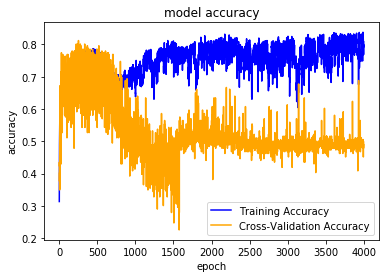

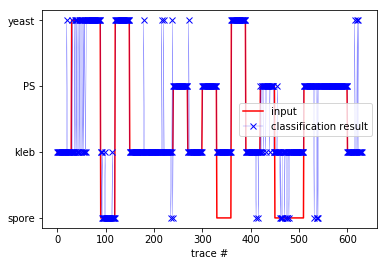

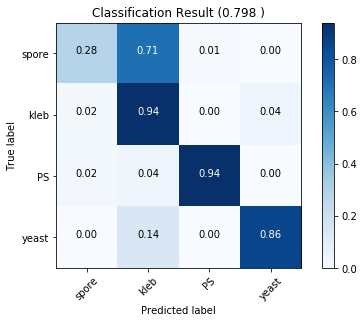

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 20us/step


Score: 0.6238095236203027, SKScore: 0.6238095238095238


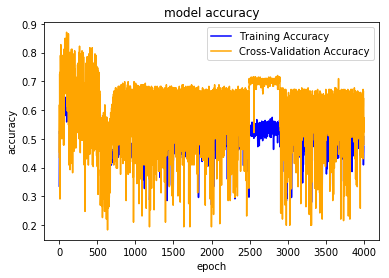

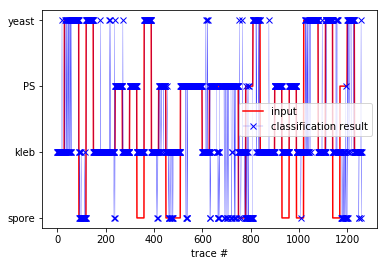

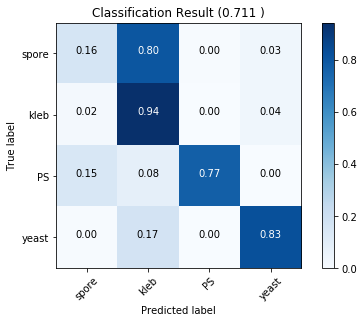

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 21us/step


Score: 0.7222222222222222, SKScore: 0.7222222222222222


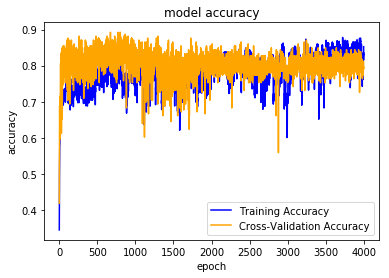

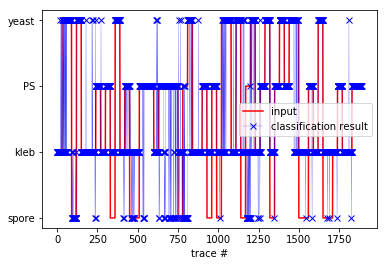

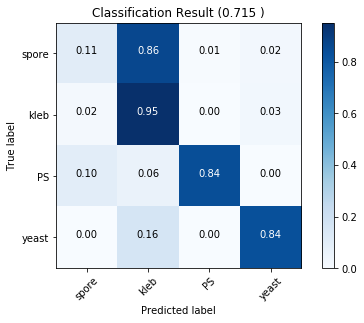

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 19us/step


Score: 0.7714285714285715, SKScore: 0.7714285714285715


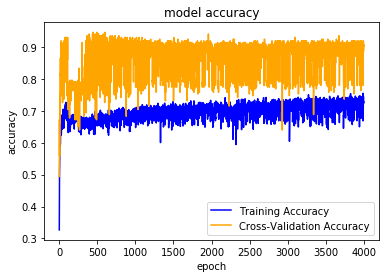

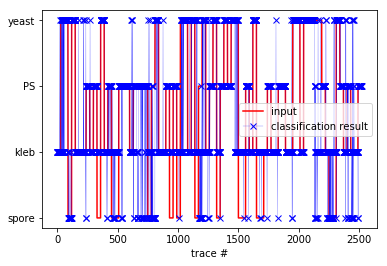

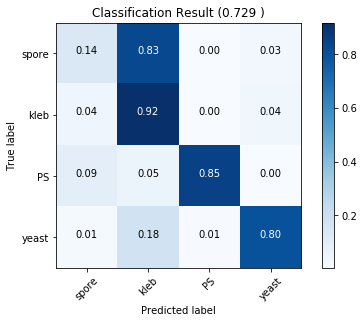

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 20us/step


Score: 0.7460317462209671, SKScore: 0.746031746031746


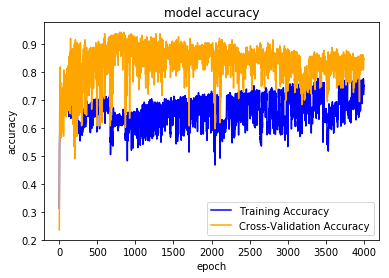

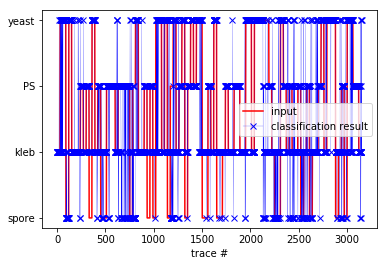

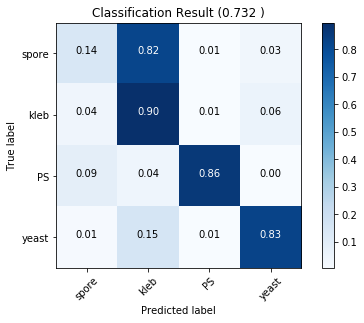

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 20us/step


Score: 0.4888888888888889, SKScore: 0.4888888888888889


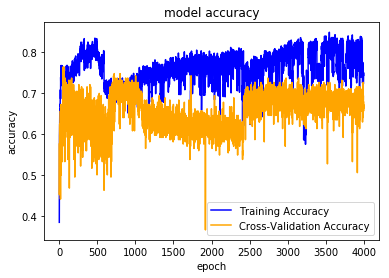

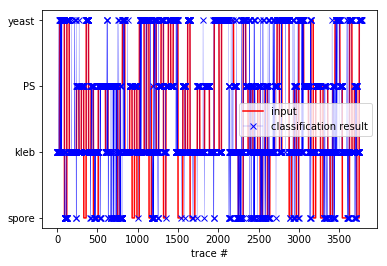

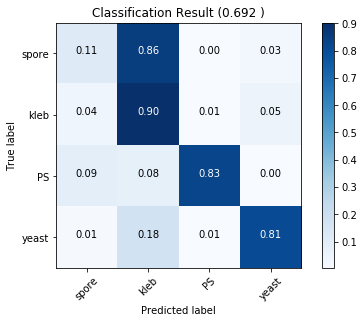

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 20us/step


Score: 0.780952380952381, SKScore: 0.780952380952381


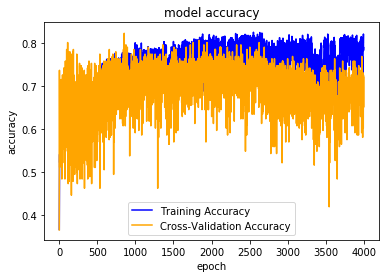

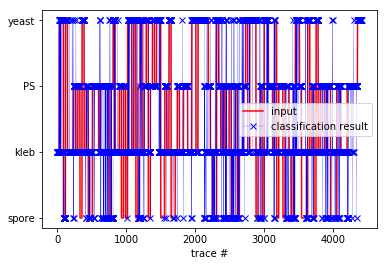

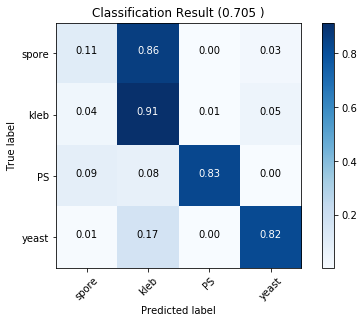

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 21us/step


Score: 0.7269841267949059, SKScore: 0.726984126984127


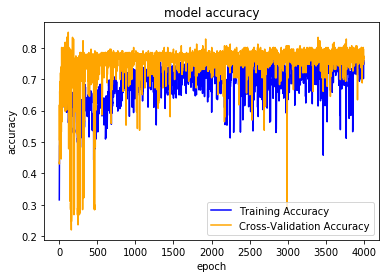

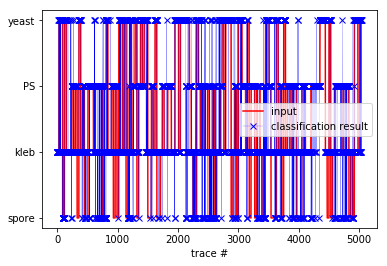

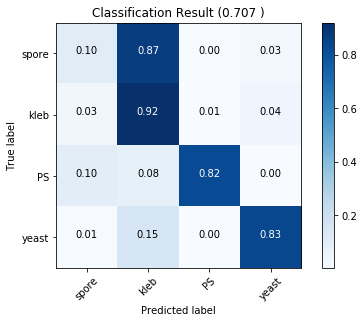

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 20us/step


Score: 0.7015873016819122, SKScore: 0.7015873015873015


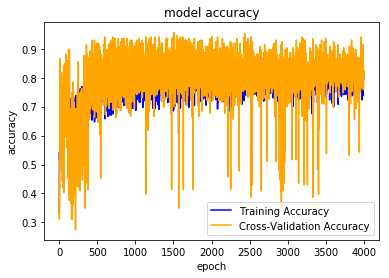

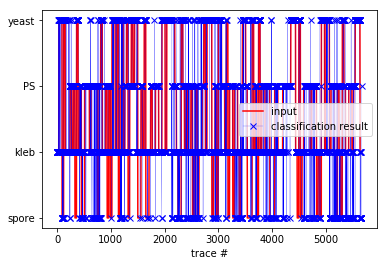

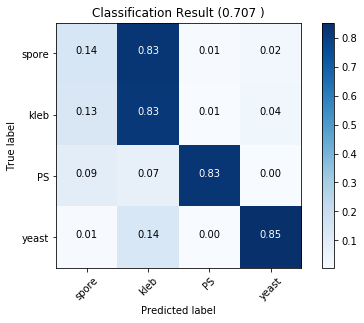

 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 20us/step


Score: 0.6904761907600221, SKScore: 0.6904761904761905


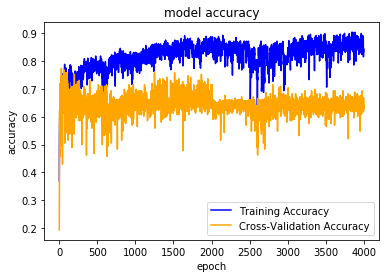

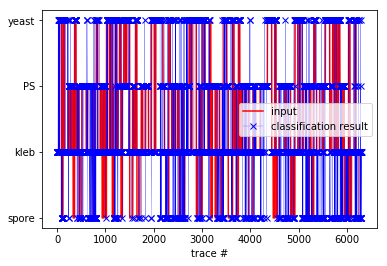

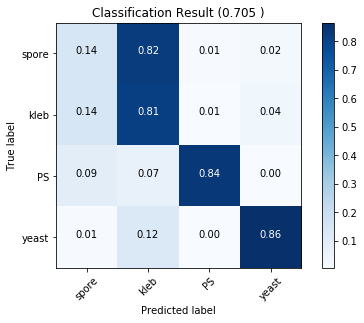

ValueError: Dimensions of labels and X must be compatible

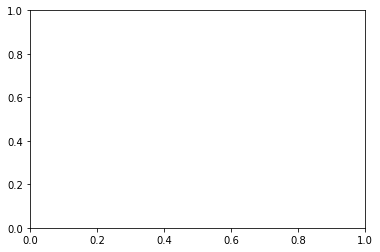

In [9]:
def makeModel(lossFunction="categorical_crossentropy", optimizer="SGD"):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=points))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(numClasses, activation='softmax'))
        
    if optimizer == "Adam":
        o = Adam()
    else:
        o = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=lossFunction, optimizer=o, metrics=['accuracy'])
    # print(model.summary())
    return model

def runModel(numRepetitions=1):
    
    scores=[]
   
    results=[]
    runScores=[]
    truths=[]
    labels=["run"]
    
    for i in range(numRepetitions):
        model=makeModel()
        trainingData, oneHotTrainingClasses, validationData, oneHotValidationClasses=makeRandomData()
        history = model.fit(trainingData, oneHotTrainingClasses, 
                            epochs=4000, validation_split=0.1, 
                            verbose=0)
    
        score = model.evaluate(validationData, oneHotValidationClasses)
        prd = model.predict(validationData)
        skScore=metrics.accuracy_score(scalarClassesFromOneHotArray(oneHotValidationClasses),scalarClassesFromOneHotArray(prd))
        print("Score: {}, SKScore: {}".format(score[1], skScore))
        results.extend(scalarClassesFromOneHotArray(prd))
        runScores.append(skScore)
        truths.extend(scalarClassesFromOneHotArray(oneHotValidationClasses))
        plt.plot(history.history['acc'], color='blue')
        plt.plot(history.history['val_acc'], color='orange')

        avgScore=sum(runScores)/float(len(runScores))
        # print("Optimizer: {}, Score: {}".format(filter,avgScore))
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Training Accuracy', 'Cross-Validation Accuracy'])
        plt.show()
        scores.append(runScores)
        pt.plotResult(results,truths,sortedTypes)
        mtrx = metrics.confusion_matrix(truths,results)
        pt.plotConfusionMatrix(mtrx,sortedTypes,"Classification Result (%.03g )" % avgScore, normalize=True)
        
    npScores=np.array(scores)
    plt.boxplot(np.transpose(npScores), labels=labels, showmeans=True)


model=makeModel()
# showModel(model)
# saveModel("kerasNN.png")
runModel(numRepetitions=10)


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 22us/step


Score: 0.5460317460790513, SKScore: 0.546031746031746
0.546031746031746


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 22us/step


Score: 0.6317460317460317, SKScore: 0.6317460317460317
0.6317460317460317


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 22us/step


Score: 0.5396825391148764, SKScore: 0.5396825396825397
0.5396825396825397


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 22us/step


Score: 0.7000000009461055, SKScore: 0.7
0.7


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 21us/step


Score: 0.6444444444444445, SKScore: 0.6444444444444445
0.6444444444444445


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 22us/step


Score: 0.680952380952381, SKScore: 0.680952380952381
0.680952380952381


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 22us/step


Score: 0.719047618858398, SKScore: 0.719047619047619
0.719047619047619


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 24us/step


Score: 0.7968253968253968, SKScore: 0.7968253968253968
0.7968253968253968


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 22us/step


Score: 0.8142857142857143, SKScore: 0.8142857142857143
0.8142857142857143


 32/630 [>.............................] - ETA: 0s

630/630 [==============================] - 0s 22us/step


Score: 0.4984126984126984, SKScore: 0.4984126984126984
0.4984126984126984
Optimizer: NONE, Score: 0.657142857142857


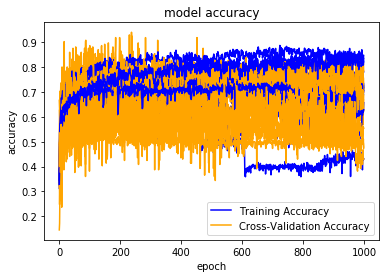

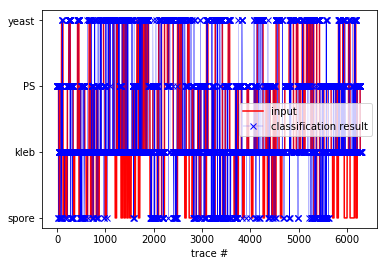

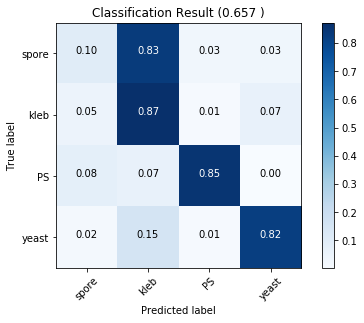

 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 25us/step


Score: 0.1904761927468436, SKScore: 0.19047619047619047
0.19047619047619047


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 25us/step


Score: 0.514285714569546, SKScore: 0.5142857142857142
0.5142857142857142


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 25us/step


Score: 0.2190476191422296, SKScore: 0.21904761904761905
0.21904761904761905


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 27us/step


Score: 0.4730158732997047, SKScore: 0.473015873015873
0.473015873015873


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 25us/step


Score: 0.28571428576159097, SKScore: 0.2857142857142857
0.2857142857142857


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 26us/step


Score: 0.7523809542731633, SKScore: 0.7523809523809524
0.7523809523809524


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 26us/step


Score: 0.47301587206976753, SKScore: 0.473015873015873
0.473015873015873


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 27us/step


Score: 0.42222222203300114, SKScore: 0.4222222222222222
0.4222222222222222


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 25us/step


Score: 0.6126984151582869, SKScore: 0.6126984126984127
0.6126984126984127


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 26us/step


Score: 0.5269841292547801, SKScore: 0.526984126984127
0.526984126984127
Optimizer: BOTTOMSDEV, Score: 0.446984126984127


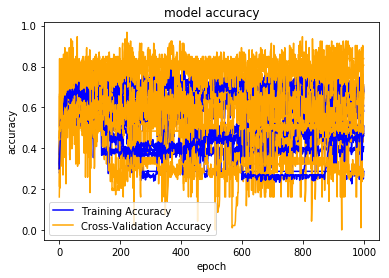

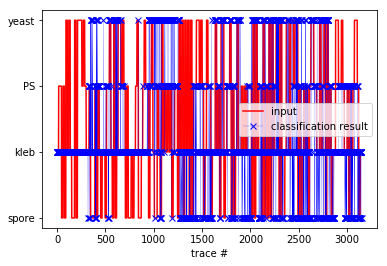

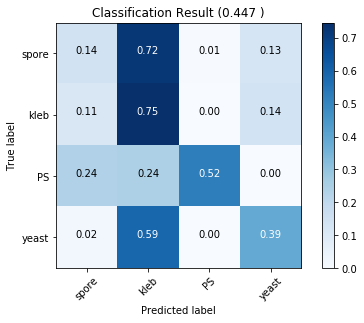

 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 25us/step


Score: 0.142857145127796, SKScore: 0.14285714285714285
0.14285714285714285


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 28us/step


Score: 0.4793650818249536, SKScore: 0.4793650793650794
0.4793650793650794


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 27us/step


Score: 0.28571428798493886, SKScore: 0.2857142857142857
0.2857142857142857


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 27us/step


Score: 0.5650793647009229, SKScore: 0.5650793650793651
0.5650793650793651


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 30us/step


Score: 0.3619047619047619, SKScore: 0.3619047619047619
0.3619047619047619


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 26us/step


Score: 0.23809524036589122, SKScore: 0.23809523809523808
0.23809523809523808


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 28us/step


Score: 0.19047619047619047, SKScore: 0.19047619047619047
0.19047619047619047


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 28us/step


Score: 0.4984127001156883, SKScore: 0.4984126984126984
0.4984126984126984


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 28us/step


Score: 0.14285714285714285, SKScore: 0.14285714285714285
0.14285714285714285


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 29us/step


Score: 0.5650793650793651, SKScore: 0.5650793650793651
0.5650793650793651
Optimizer: TOPSDEV, Score: 0.346984126984127


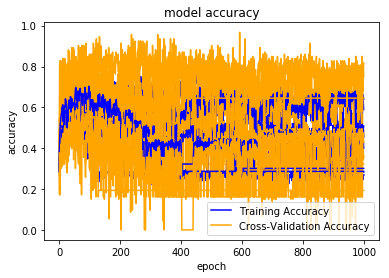

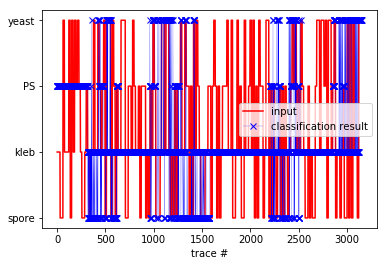

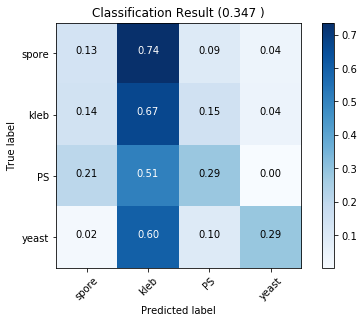

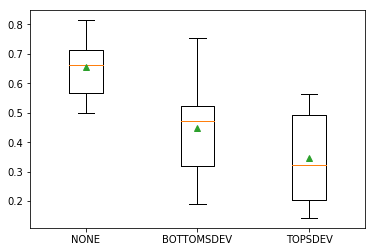

In [11]:
def makeModel(lossFunction="categorical_crossentropy", optimizer="SGD"):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=points))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(numClasses, activation='softmax'))
        
    if optimizer == "Adam":
        o = Adam()
    else:
        o = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(loss=lossFunction, optimizer=o, metrics=['accuracy'])
    # print(model.summary())
    return model

def runModel(numRepetitions=1):
    
    scores=[]
   
    labels=[]
    
    for filter in ["NONE", "BOTTOMSDEV","TOPSDEV"]:
        runScores=[]
        results=[]
        truths=[]
        labels.append(str(filter))
        
        for i in range(numRepetitions):
            model=makeModel()
            trainingData, oneHotTrainingClasses, validationData, oneHotValidationClasses=makeRandomData(filter=filter)
            history = model.fit(trainingData, oneHotTrainingClasses, epochs=1000, validation_split=0.1, verbose=0)
            score = model.evaluate(validationData, oneHotValidationClasses)
            prd = model.predict(validationData)
            skScore=metrics.accuracy_score(scalarClassesFromOneHotArray(oneHotValidationClasses),scalarClassesFromOneHotArray(prd))
            print("Score: {}, SKScore: {}".format(score[1], skScore))
            print(skScore)
            results.extend(scalarClassesFromOneHotArray(prd))
            runScores.append(skScore)
            truths.extend(scalarClassesFromOneHotArray(oneHotValidationClasses))
            plt.plot(history.history['acc'], color='blue')
            plt.plot(history.history['val_acc'], color='orange')
        
        avgScore=sum(runScores)/float(len(runScores))
        print("Optimizer: {}, Score: {}".format(filter,avgScore))
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Training Accuracy', 'Cross-Validation Accuracy'])
        plt.show()
        scores.append(runScores)
        pt.plotResult(results,truths,sortedTypes)
        mtrx = metrics.confusion_matrix(truths,results)
        pt.plotConfusionMatrix(mtrx,sortedTypes,"Classification Result (%.03g )" % avgScore, normalize=True)
        
    npScores=np.array(scores)
    plt.boxplot(np.transpose(npScores), labels=labels, showmeans=True)
    

model=makeModel()
# showModel(model)
# saveModel("kerasNN.png")
runModel(numRepetitions=10)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_133 (Conv1D)          (None, 998, 64)           256       
_________________________________________________________________
conv1d_134 (Conv1D)          (None, 996, 64)           12352     
_________________________________________________________________
max_pooling1d_34 (MaxPooling (None, 332, 64)           0         
_________________________________________________________________
conv1d_135 (Conv1D)          (None, 330, 128)          24704     
_________________________________________________________________
conv1d_136 (Conv1D)          (None, 328, 128)          49280     
_________________________________________________________________
global_average_pooling1d_34  (None, 128)               0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)               0         
__________

 32/630 [>.............................] - ETA: 0s

544/630 [========================>.....] - ETA: 0s

630/630 [==============================] - 0s 106us/step


Score: 0.6317460319352528, SKScore: 0.6317460317460317
0.6317460317460317


 32/630 [>.............................] - ETA: 0s

576/630 [==========================>...] - ETA: 0s

630/630 [==============================] - 0s 96us/step


Score: 0.5968253969673126, SKScore: 0.5968253968253968
0.5968253968253968


 32/630 [>.............................] - ETA: 0s

544/630 [========================>.....] - ETA: 0s

630/630 [==============================] - 0s 108us/step


Score: 0.6031746026069399, SKScore: 0.6031746031746031
0.6031746031746031


 32/630 [>.............................] - ETA: 0s

544/630 [========================>.....] - ETA: 0s

630/630 [==============================] - 0s 107us/step


Score: 0.641269841553673, SKScore: 0.6412698412698413
0.6412698412698413


 32/630 [>.............................] - ETA: 0s

576/630 [==========================>...] - ETA: 0s

630/630 [==============================] - 0s 100us/step


Score: 0.5746031736570691, SKScore: 0.5746031746031746
0.5746031746031746


 32/630 [>.............................] - ETA: 0s

512/630 [=======================>......] - ETA: 0s

630/630 [==============================] - 0s 112us/step


Score: 0.636507935561831, SKScore: 0.6365079365079365
0.6365079365079365


 32/630 [>.............................] - ETA: 0s

576/630 [==========================>...] - ETA: 0s

630/630 [==============================] - 0s 100us/step


Score: 0.5666666659097823, SKScore: 0.5666666666666667
0.5666666666666667


 32/630 [>.............................] - ETA: 0s

512/630 [=======================>......] - ETA: 0s

630/630 [==============================] - 0s 114us/step


Score: 0.5317460315568107, SKScore: 0.5317460317460317
0.5317460317460317


 32/630 [>.............................] - ETA: 0s

544/630 [========================>.....] - ETA: 0s

630/630 [==============================] - 0s 103us/step


Score: 0.6730158730158731, SKScore: 0.6730158730158731
0.6730158730158731


 32/630 [>.............................] - ETA: 0s

576/630 [==========================>...] - ETA: 0s

630/630 [==============================] - 0s 101us/step


Score: 0.6079365078418973, SKScore: 0.6079365079365079
0.6079365079365079
Optimizer: NONE, Score: 0.6063492063492063


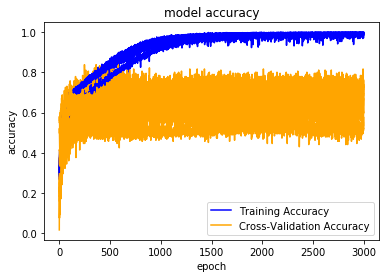

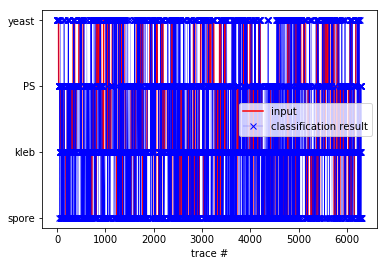

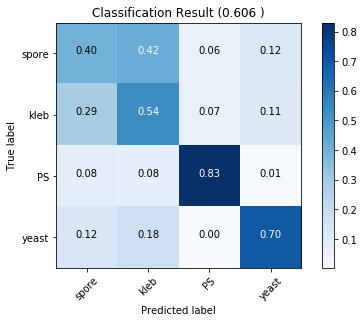

 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 112us/step


Score: 0.6222222224114433, SKScore: 0.6222222222222222
0.6222222222222222


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 116us/step


Score: 0.6634920621675159, SKScore: 0.6634920634920635
0.6634920634920635


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 110us/step


Score: 0.6126984128876338, SKScore: 0.6126984126984127
0.6126984126984127


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 116us/step


Score: 0.523809526269398, SKScore: 0.5238095238095238
0.5238095238095238


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 114us/step


Score: 0.6952380952380952, SKScore: 0.6952380952380952
0.6952380952380952


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 118us/step


Score: 0.5142857140964932, SKScore: 0.5142857142857142
0.5142857142857142


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 103us/step


Score: 0.5365079354672205, SKScore: 0.5365079365079365
0.5365079365079365


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 108us/step


Score: 0.4984126980342562, SKScore: 0.4984126984126984
0.4984126984126984


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 116us/step


Score: 0.6063492054031009, SKScore: 0.6063492063492063
0.6063492063492063


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 123us/step


Score: 0.5555555545148395, SKScore: 0.5555555555555556
0.5555555555555556
Optimizer: BOTTOMSDEV, Score: 0.5828571428571427


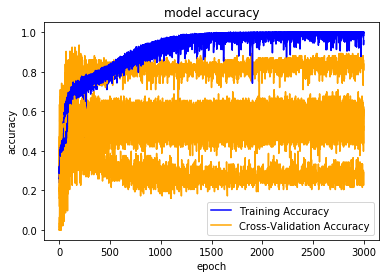

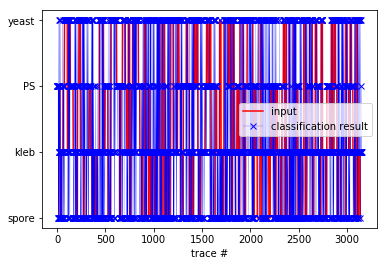

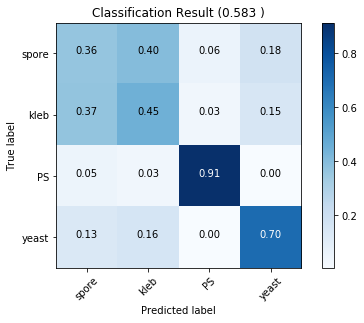

 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 115us/step


Score: 0.5460317464101883, SKScore: 0.546031746031746
0.546031746031746


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 114us/step


Score: 0.5841269852623107, SKScore: 0.5841269841269842
0.5841269841269842


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 122us/step


Score: 0.5714285709082134, SKScore: 0.5714285714285714
0.5714285714285714


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 124us/step


Score: 0.6349206347314138, SKScore: 0.6349206349206349
0.6349206349206349


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 117us/step


Score: 0.5206349191211519, SKScore: 0.5206349206349207
0.5206349206349207


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 128us/step


Score: 0.4476190478082687, SKScore: 0.44761904761904764
0.44761904761904764


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 131us/step


Score: 0.5047619070325579, SKScore: 0.5047619047619047
0.5047619047619047


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 134us/step


Score: 0.5936507927046881, SKScore: 0.5936507936507937
0.5936507936507937


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 129us/step


Score: 0.5587301596762642, SKScore: 0.5587301587301587
0.5587301587301587


 32/315 [==>...........................] - ETA: 0s

315/315 [==============================] - 0s 117us/step


Score: 0.46984127012510146, SKScore: 0.46984126984126984
0.46984126984126984
Optimizer: TOPSDEV, Score: 0.5431746031746031


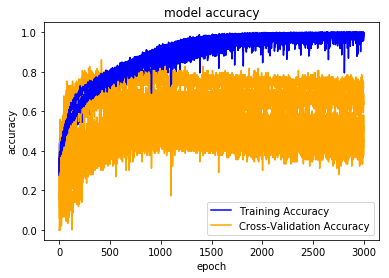

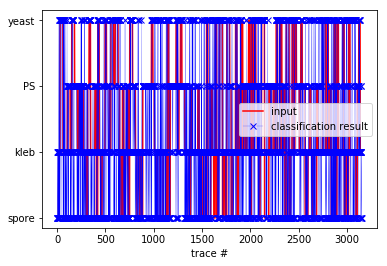

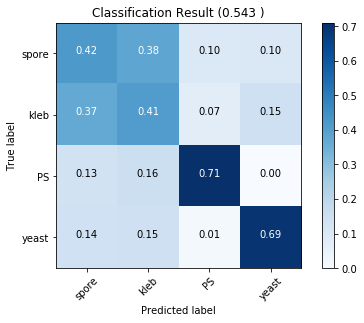

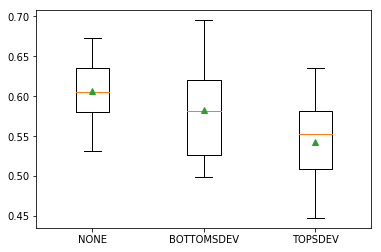

In [10]:
def makeModel(lossFunction="categorical_crossentropy"):
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(points, 1)))
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(Conv1D(128, 3, activation='relu'))
    model.add(GlobalAveragePooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(numClasses, activation='softmax'))
    model.compile(loss=lossFunction,
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

epochs=3000

def runModel(numRepetitions=1):
    
    scores=[]
   
    labels=[]
    
    for filter in ["NONE", "BOTTOMSDEV","TOPSDEV"]:
        runScores=[]
        results=[]
        truths=[]
        labels.append(str(filter))
        
        for i in range(numRepetitions):
            model=makeModel()
            trainingData, oneHotTrainingClasses, validationData, oneHotValidationClasses=makeRandomData(filter=filter)
            #https://stackoverflow.
            # com/questions/43396572/dimension-of-shape-in-conv1d/43399308#43399308
            reshapedTraining = np.expand_dims(trainingData, axis=2)
            reshapedValidation = np.expand_dims(validationData, axis=2)
            
            history = model.fit(reshapedTraining, oneHotTrainingClasses, epochs=epochs, validation_split=0.1, verbose=0)
            score = model.evaluate(reshapedValidation, oneHotValidationClasses)
            prd = model.predict(reshapedValidation)
            skScore=metrics.accuracy_score(scalarClassesFromOneHotArray(oneHotValidationClasses),scalarClassesFromOneHotArray(prd))
            print("Score: {}, SKScore: {}".format(score[1], skScore))
            print(skScore)
            results.extend(scalarClassesFromOneHotArray(prd))
            runScores.append(skScore)
            truths.extend(scalarClassesFromOneHotArray(oneHotValidationClasses))
            plt.plot(history.history['acc'], color='blue')
            plt.plot(history.history['val_acc'], color='orange')
        
        avgScore=sum(runScores)/float(len(runScores))
        print("Optimizer: {}, Score: {}".format(filter,avgScore))
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['Training Accuracy', 'Cross-Validation Accuracy'])
        plt.show()
        scores.append(runScores)
        pt.plotResult(results,truths,sortedTypes)
        mtrx = metrics.confusion_matrix(truths,results)
        pt.plotConfusionMatrix(mtrx,sortedTypes,"Classification Result (%.03g )" % avgScore, normalize=True)
        
    npScores=np.array(scores)
    plt.boxplot(np.transpose(npScores), labels=labels, showmeans=True)
    


model=makeModel()
print(model.summary())
# showModel(model)
# saveModel("keras1DCNN.png")
runModel(numRepetitions=10)

